In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import h5py
import keras
from keras.layers import *
from keras.utils import plot_model
from keras import regularizers

%matplotlib inline

In [0]:
os.chdir('drive/My Drive/Dataset')

In [0]:
def Load_Data():
  
  train_dataset = h5py.File('train_happy.h5','r')
  test_dataset = h5py.File('test_happy.h5','r')
  
  train_set_X_orig = np.array(train_dataset['train_set_x'][:])
  train_set_Y_orig = np.array(train_dataset['train_set_y'][:])
  test_set_X_orig = np.array(test_dataset['test_set_x'][:])
  test_set_Y_orig = np.array(test_dataset['test_set_y'][:])
  
  classes = np.array(test_dataset['list_classes'][:])
  
  return train_set_X_orig,train_set_Y_orig,test_set_X_orig,test_set_Y_orig,classes

(600, 64, 64, 3) (600,) (150, 64, 64, 3) (150,)
y = 1. The person is Happy.


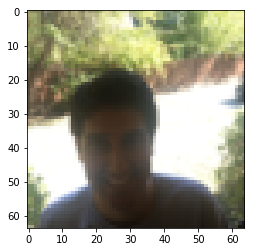

In [220]:
train_set_X_orig,train_set_Y_orig,test_set_X_orig,test_set_Y_orig,classes = Load_Data()

print(train_set_X_orig.shape,train_set_Y_orig.shape,test_set_X_orig.shape,test_set_Y_orig.shape)
i = 3
plt.imshow(test_set_X_orig[i])
print('y = '+str(test_set_Y_orig[i])+'. The person is','Happy.' if test_set_Y_orig[i] else 'not Happy.')

In [0]:
def Reshape_And_Normalize(train_set_X_orig,train_set_Y_orig,test_set_X_orig,test_set_Y_orig):
  
  m_train = train_set_X_orig.shape[0]
  m_test = test_set_X_orig.shape[0]
  train_set_X = train_set_X_orig.reshape(m_train,-1)
  test_set_X = test_set_X_orig.reshape(m_test,-1)

  train_set_Y = train_set_Y_orig.reshape((m_train,1))
  test_set_Y = test_set_Y_orig.reshape((m_test,1))
  
  U_train = np.sum(train_set_X,axis=1,keepdims=True)/m_train
  U_test = np.sum(test_set_X,axis=1,keepdims=True)/m_test
  
  train_set_X = train_set_X - U_train
  test_set_X = test_set_X - U_test
  
  sigma_train = np.sqrt(np.sum(np.square(train_set_X),axis=1,keepdims=True)/m_train)
  sigma_test = np.sqrt(np.sum(np.square(test_set_X),axis=1,keepdims=True)/m_test)
  
  train_set_X /= sigma_train
  test_set_X /= sigma_test
  
  return train_set_X,train_set_Y,test_set_X,test_set_Y

In [0]:
def Data_Preprocessing():
  
  train_set_X_orig,train_set_Y_orig,test_set_X_orig,test_set_Y_orig,classes = Load_Data()
  train_set_X,train_set_Y,test_set_X,test_set_Y = Reshape_And_Normalize(train_set_X_orig,train_set_Y_orig,test_set_X_orig,test_set_Y_orig)
  
  return train_set_X,train_set_Y,test_set_X,test_set_Y

In [0]:
def Propagation(input_shape,output_neurons):
  
  X_input = Input(input_shape)
  X = X_input
  
  if(output_neurons > 1):
    activation_type = 'softmax'
  elif(output_neurons == 1):
    activation_type = 'sigmoid'
  
  X = BatchNormalization(axis=1,name='BatchNormalization')(X)
  X = Dense(output_neurons,use_bias=True,activation=activation_type,kernel_initializer='glorot_uniform', bias_initializer='zeros',name='FullyConnected',kernel_regularizer=regularizers.l2(0.01))(X)
  
  model = keras.models.Model(inputs=X_input,outputs=X,name="ANN_Keras")
  
  return model

In [0]:
def Caller_Function():
  
  train_set_X,train_set_Y,test_set_X,test_set_Y = Data_Preprocessing()
  epochs = 10
  mini_batch_size = 50
  output_neurons = 1
  
  if(output_neurons > 1):
    train_set_Y = np.eye(output_neurons)[train_set_Y.T][0]
    test_set_Y = np.eye(output_neurons)[test_set_Y.T][0]
    loss_val = 'categorical_crossentropy'
  elif(output_neurons == 1):
    loss_val = 'binary_crossentropy'
    
  input_shape = [train_set_X.shape[1]]
 
  model = Propagation(input_shape,output_neurons)
  model.compile(loss=loss_val,optimizer='adam',metrics=['accuracy'])
  model.fit(x=train_set_X[0:50,:],y=train_set_Y[0:50,:],epochs=epochs,batch_size=mini_batch_size)
  print('')
  preds = model.evaluate(x=train_set_X[0:20,:],y=train_set_Y[0:20,:])
  print("Train_Accuracy : "+str(preds[1]*100))
  print('')
  preds = model.evaluate(x=test_set_X[0:10,:],y=test_set_Y[0:10,:])
  print("Test_Accuracy : "+str(preds[1]*100))
  
  model.summary()
  print(model.predict(train_set_X[1:4,:]))

In [221]:
Caller_Function()

Epoch 1/10
50/50 [==============================] - 5s 104ms/step - loss: 0.6961 - acc: 0.6600
Epoch 2/10
50/50 [==============================] - 0s 385us/step - loss: 0.6174 - acc: 0.7400
Epoch 3/10
50/50 [==============================] - 0s 308us/step - loss: 0.5618 - acc: 0.7000
Epoch 4/10
50/50 [==============================] - 0s 357us/step - loss: 0.5217 - acc: 0.7200
Epoch 5/10
50/50 [==============================] - 0s 348us/step - loss: 0.4864 - acc: 0.7200
Epoch 6/10
50/50 [==============================] - 0s 365us/step - loss: 0.4530 - acc: 0.7200
Epoch 7/10
50/50 [==============================] - 0s 336us/step - loss: 0.4218 - acc: 0.7800
Epoch 8/10
50/50 [==============================] - 0s 342us/step - loss: 0.3938 - acc: 0.8600
Epoch 9/10
50/50 [==============================] - 0s 467us/step - loss: 0.3692 - acc: 0.9200
Epoch 10/10
50/50 [==============================] - 0s 368us/step - loss: 0.3472 - acc: 0.9600

20/20 [==============================] - 2s 110m